In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Linear transforms.ipynb")

# Matrix Analysis 2024 - EE312
## Week 2  - Linear transforms
[N. Aspert](https://people.epfl.ch/nicolas.aspert) - [LTS2](https://lts2.epfl.ch)

The first week notebook (introduction to Python, Numpy and Matplotlib) can be used as a help.

## Important
You need to submit *individually* your answers on moodle before the next exercise session. For the theoretical questions you can either fill the notebook or write it on a separate sheet (if you are not comfortable with Markdown/TeX) and upload a scanned version. 

## Objective

The end goal is to understand purely algebraic, matrix based, view of a few linear transforms. You will use those linear transform to perform some basic time-frequency analysis of signals.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part I - Fourier

<!-- BEGIN QUESTION -->
---
1. Prove that any set of orthogonal vectors $v_i \in \mathbb{C}^N, \, i=1, \ldots , M \leq N$ such that $v_i^H v_j = C \delta_{i,j}$ is linearly independent (where $C$ is some constant).

Let's suppose that this set in not linearly independent and thus $v_i = \sum _{k=1, k \ne i}^{M} \alpha_k v_k$.

As such, we have: $$C = v_i^Hv_i = v_i^H \sum _{k=1, k \ne i}^{M} \alpha_k v_k =  \sum _{k=1, k \ne i}^{M} \alpha_k v_i^H v_k $$
Because $v_i^H v_k = 0$ for all $i\ne k$, this last sum must equal 0, yet we said it should equal $C\ne 0$.

This is a contradiction and thus, the set of vectors must be linearly independent.

<!-- END QUESTION -->
---
<!-- BEGIN QUESTION -->

2. Compute $a_r = \sum_{n=0}^{N-1}e^{j2\pi r\frac{n}{N}}$, where $r$ is an integer (discuss the result depending on the value of $r$).

This is a geometric sum:

$$a_r = \sum_{n=0}^{N-1}(e^{j2\pi \frac{r}{N}})^n = \frac{1-e^{j2\pi r}}{1-e^{j2\pi \frac{r}{N}}}$$

To avoid dividing by 0, we must check the condition $e^{j2\pi \frac{r}{N}} \ne 1$. This happens for $r=k\cdot N$ where $k=0,1,2,...$. 
In this case, we would get $a_r = \sum_{n=0}^{N-1} 1^n = N$.


So $$ a_r = \begin{cases} N & \text{ if } r=k\cdot N  \text{ with } k \in \Z  \\ \frac{1-e^{j2\pi r}}{1-e^{j2\pi \frac{r}{N}}} & \text{ otherwise} \end{cases} $$

<!-- END QUESTION -->
---
<!-- BEGIN QUESTION -->

3. Let $v_k \in \mathbb{C}^N$ be such that $v_k[n] = e^{-j 2 \pi \frac{kn}{N}}$, for $k,n = 0, \ldots , N-1$. 
- Prove that these vectors are mutually orthogonal, hence linearly independent. 
- Compute the norm of $v_k$.


Lets take two arbitrary vectors:

$    v_i = \begin{bmatrix}
           e^{-j2\pi i\frac{0}{N}} \\
           e^{-j2\pi i\frac{1}{N}} \\
           \vdots \\
           e^{-j2\pi i\frac{N-1}{N}}
         \end{bmatrix}
$
and 
$    v_j = \begin{bmatrix}
           e^{-j2\pi j\frac{0}{N}} \\
           e^{-j2\pi j\frac{1}{N}} \\
           \vdots \\
           e^{-j2\pi j\frac{N-1}{N}}
         \end{bmatrix}
$

To prove they are orthogonal we must prove $\langle v_i, v_j \rangle=0$ for $i \ne j$, let's compute that: 

\begin{align*}
  \langle v_i, v_j \rangle = v_i^H \cdot v_j &= \begin{bmatrix}
                              e^{j2\pi i\frac{0}{N}} \\
                              e^{j2\pi i\frac{1}{N}} \\
                              \vdots \\
                              e^{j2\pi i\frac{N-1}{N}}
                            \end{bmatrix}^T \cdot 
                            \begin{bmatrix}
                              e^{-j2\pi j\frac{0}{N}} \\
                              e^{-j2\pi j\frac{1}{N}} \\
                              \vdots \\
                              e^{-j2\pi j\frac{N-1}{N}}
                            \end{bmatrix}\\

                                            &= \sum_{n=0}^{N-1} e^{j2\pi (i-j) \frac{n}{N}} 
\end{align*}
Using what we found in the last exercice and because $i-j \le N-1$, we can compute:
\begin{align*}
\sum_{n=0}^{N-1} e^{j2\pi (i-j) \frac{n}{N}} = \frac{1-e^{j2\pi (i-j)}}{1-e^{j2\pi \frac{i-j}{N}}}
\end{align*}
If $i \ne j$ and because $i$ and $j$ are integers, we get:
\begin{align*}
\frac{1-e^{j2\pi (i-j)}}{1-e^{j2\pi \frac{i-j}{N}}}=\frac{1-1}{1-e^{j2\pi \frac{i-j}{N}}} = 0     \phantom{xxxxxx} \text{( because $ e^{j2\pi \frac{i-j}{N}} \ne 1$ )}
\end{align*}.

We thus have proven that $\langle v_i, v_j \rangle=0$ for $i \ne j$, meaning they are orthogonal and hence, they are linearly independent.

To compute the norm of $v_i$ we calculate:

\begin{align*}
    ||v_i||² &= \langle v_i, v_i \rangle \\
             &= lim_{x \to i} \frac{1-e^{j2\pi (i-x)}}{1-e^{j2\pi \frac{i-x}{N}}}\\
             &= lim_{x \to i} \frac{j2\pi e^{j2\pi (i-x)}}{j2\pi\frac{1}{N}e^{j2\pi \frac{i-x}{N}}}\\
             &= lim_{x \to i} N e^{j2\pi (i-x) (1-\frac{1}{N})}\\
             &= N
\end{align*}

So the norm of $v_i$ is $ ||v_i|| = \sqrt{N} $.

---

<!-- END QUESTION -->

4. Implement the function `get_fourier_matrix` that returns a normalized Fourier matrix of size $N\times N$. Do not make use of the builtin DFT/FFT functions in `numpy` or `scipy`. Raise a `ValueError` exception if a ngetive or zero $N$ value is supplied.

In [3]:
def get_fourier_matrix(N):
    if N <=0:
        raise ValueError('N must be a positive integer')
    
    res = np.zeros((N,N),dtype=complex)

    for j in range(N):
        for k in range(N):
            res[j,k] = np.exp(-2j*np.pi*j*k/N)/np.sqrt(N)

    return res

In [4]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: Good, your implementation returns correct results
q4 - 2 message: Good, you did not use the scipy.linalg.dft function
q4 - 3 message: Good, you did not use the scipy.fft.fft function
q4 - 4 message: Good, you did not use the numpy.fft.fft function
q4 - 5 message: Good, your implementation returns an orthogonal matrix
q4 - 6 message: Good, you properly validated size before computing the result

Let us now generate two test signals. 

The first one $x_1(t)$ is made of four piecewise sinusoids, of different frequencies:

$$
x_1(t) = \cos(2\pi 5t), 0\le t < 2\\
x_1(t) = \cos(2\pi 10t), 2\le t < 4\\
x_1(t) = \cos(2\pi 25t), 4\le t < 6\\
x_1(t) = \cos(2\pi 50t), 6\le t < 8\\
$$


In [5]:
Fs = 256 # sampling frequency
t = np.arange(0, Fs*8)/Fs
x1 = np.zeros(Fs*8)
x1[0:Fs*2] = np.cos(2*np.pi*5*t[0:Fs*2])
x1[Fs*2:Fs*4] = np.cos(2*np.pi*10*t[Fs*2:Fs*4])
x1[Fs*4:Fs*6] = np.cos(2*np.pi*25*t[Fs*4:Fs*6])
x1[Fs*6:Fs*8] = np.cos(2*np.pi*50*t[Fs*6:Fs*8])

The second signal $x_2(t)$ is the sum of the same sinusoids over the complete time interval, with a scaling term s.t. the amplitude of both signals is identical.

In [6]:
x2 = 0.25*(np.cos(2*np.pi*5*t) + np.cos(2*np.pi*10*t) + np.cos(2*np.pi*25*t) + np.cos(2*np.pi*50*t))

<!-- BEGIN QUESTION -->

5. 
- Display the generated signals using `plt.plot`. 
- Compute their Fourier transforms using the Fourier matrix generate at the previous question.
- Display the amplitude of their Fourier spectrum. What do you observe ? 

For $x_1(t)$, the signal is composed of 4 frequencies cosines that are side by side, as such we can observe 4 "positive" and 4 "negative" frequencies in the fourier spectrum. However, there is noise in the frequency domain because the signal is obviously not a true sum of these 4 frequency signals, rather, the sudden transition between the 4 frequencies in the time domain is the reason for the noise.

For $x_2(t)$ on the other hand, it is a true sum of 4 frequencies, hence the 8 (4 positive and 4 negative) frequency peaks in the fourier domain and the lack of noise in between those peaks.

Text(0, 0.5, 'Amplitude')

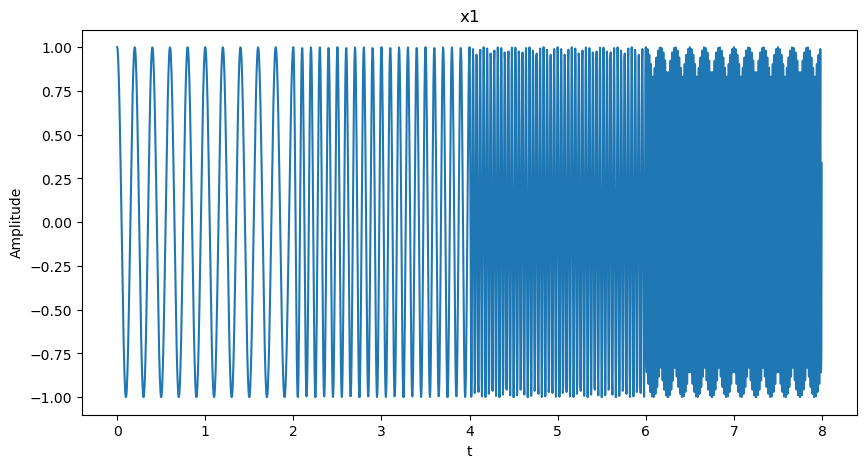

In [7]:
# plot x1
plt.figure(figsize=(10,5))
plt.plot(t,x1)
plt.title('x1')
plt.xlabel('t')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

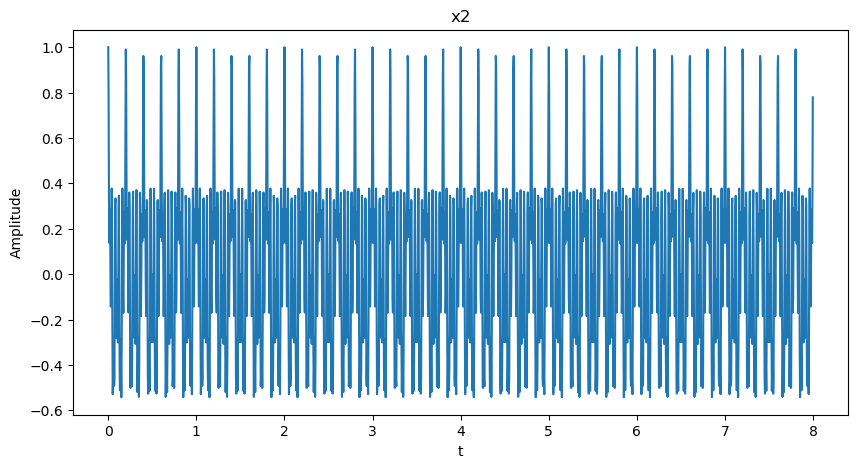

In [8]:
# plot x2
plt.figure(figsize=(10,5))
plt.plot(t,x2)
plt.title('x2')
plt.xlabel('t')
plt.ylabel('Amplitude')


In [9]:
# Compute the Fourier transform of x1 and x2
F1=get_fourier_matrix(8*Fs)@x1
F2=get_fourier_matrix(8*Fs)@x2

Text(0, 0.5, 'Amplitude')

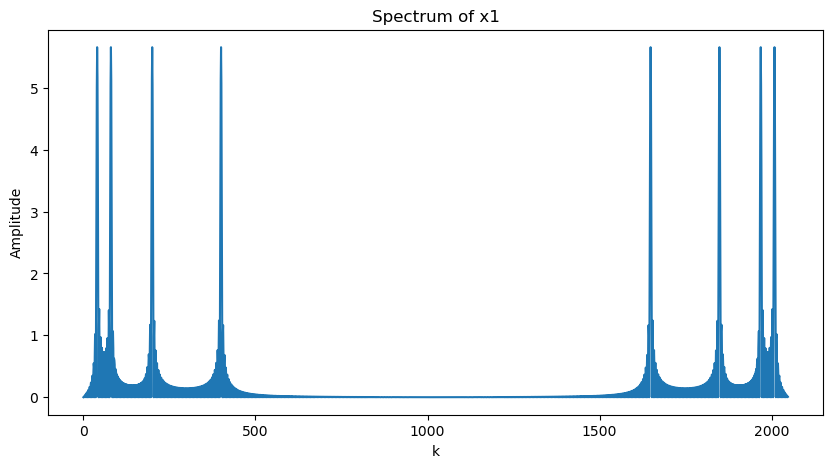

In [10]:
# Plot the spectrum of x1
plt.figure(figsize=(10,5))
plt.plot(np.abs(F1))
plt.title('Spectrum of x1')
plt.xlabel('k')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

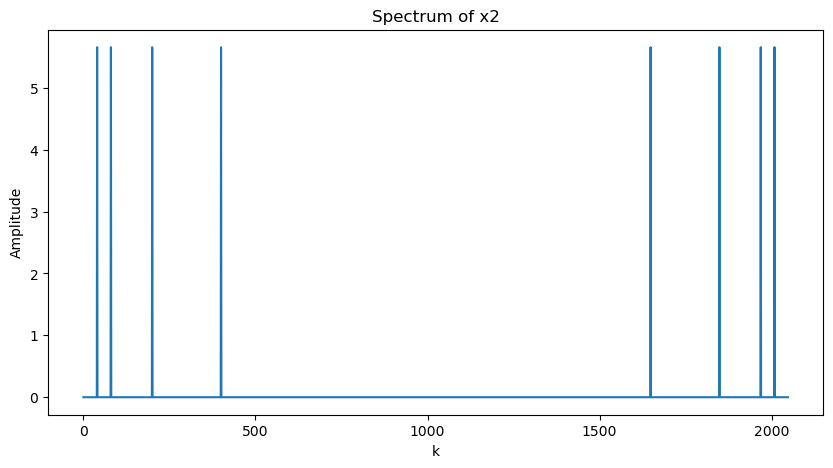

In [11]:
# Plot the spectrum of x2
plt.figure(figsize=(10,5))
plt.plot(np.abs(F2))
plt.title('Spectrum of x2')
plt.xlabel('k')
plt.ylabel('Amplitude')

<!-- END QUESTION -->

In order to have a better compromise between time and frequency, the input signal will be split in smaller non-overlapping blocks of length $p$, and we will perform the DFT of each block.

6. Using the `get_fourier_matrix` implemented previously, fill the `get_block_dft_matrix` function below s.t. it returns a $N\times N$ matrix that will perform the block Fourier transform when applied to an input vector. Raise a `ValueError` if $p$ does not divide $N$.

Hint: [numpy.pad](https://numpy.org/doc/stable/reference/generated/numpy.pad.html#numpy.pad) and/or [numpy.kron](https://numpy.org/doc/stable/reference/generated/numpy.kron.html) might prove useful.

In [12]:
def get_block_dft_matrix(N, p):
    if  N%p!=0:
        raise ValueError('N must be divisible by p')

    A = np.eye(int(N/p),dtype=complex)
    B = get_fourier_matrix(p)
    res = np.kron(A,B)

    return res


In [13]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 1 message: Good, your implementation returns an orthogonal matrix
q6 - 2 message: Good, you properly validated size before computing the result
q6 - 3 message: Good, your implementation returns the correct result

<!-- BEGIN QUESTION -->

We will now use this block Fourier transform to how the frequencies of the signal evolve through time.

7. 
- Using the `reshape` and `plt.imshow` functions, display the amplitude of the result of the block Fourier transform of $x_1$ and $x_2$. Is the result improved when compared to the one observed in question 5 ?
- What is the influence of parameter $p$ ? 


When p is smaller, we have less precision in the frequency domain (i.e the frequencies calculated are less accurate), but the frequencies we see are more precisely tied to the time domain (i.e we calculate the fourier transform on smaller time intervals). 

When p is higher, we have more precision in the frequency domain (i.e the frequencies calculated are more accurate), but the frequencies we see are less precisely tied to the time domain (i.e we calculate the fourier transform on larger time intervals). 

In [14]:
# Compute the block DFT matrix Wb
N=8*Fs
p=64
Wb = get_block_dft_matrix(N, p)

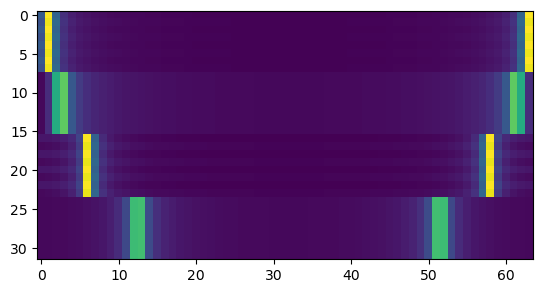

In [15]:
# Plot the block DFT of x1
plt.imshow(np.reshape(np.abs(Wb@x1),(N//p,p)))

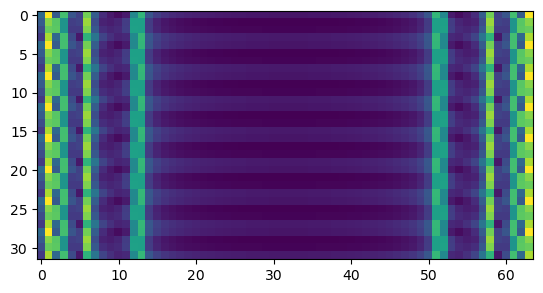

In [16]:
# Plot the block DFT of x2
plt.imshow(np.reshape(np.abs(Wb@x2),(8*Fs//64,64)))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

8. In a real-world application, would generating a $N\times N$ matrix to perform the block Fourier transform be a good way to implement it ? (Justify)

For real time signal processing applications, using block matrixes would be useful because as the signal comes in, we could calculate the frequency of the last time step.

In that vein, the parameter $p$ would be used to tune the fourier transform to either give us low latency but with a bad frequency accuracy (small $p$) or a high latency but with a good frequency accuracy (large $p$). 


<!-- END QUESTION -->

## Part II - Haar transform

In this part we will study another approach to study the time/frequency properties of signals. 

Let us consider a vector $x\in\mathbb{R}^N$, with $N$ being even. The single-level Haar transform decomposes $x$ into two vectors $a^1$ and $d^1$ belonging to $\mathbb{R}^{\frac{N}{2}}$. 

The coefficients of $a^1$ are defined as follows: $a^1_n = \frac{1}{\sqrt{2}}(x_{2n-1} + x_{2n}), n=1, ..., \frac{N}{2}$. $a^1$ is referred to as the *average coefficients vector*.

The coefficients of $d^1$ are defined as follows: $d^1_n = \frac{1}{\sqrt{2}}(x_{2n-1} - x_{2n}), n=1, ..., \frac{N}{2}$. $d^1$ is referred to as the *detail coefficients vector*.


<!-- BEGIN QUESTION -->

9. Let us represent the single-level Haar transform by a matrix $H_1$ s.t. 
$$
H_1 x = \begin{pmatrix}a^1 \\ d^1\end{pmatrix}
$$
Prove that $H_1$ is orthonormal.

For N = 2 the single level Haar matrix is 

\begin{equation*}
H_{1} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
\end{equation*}

We see immediately that the vectors 
$\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
1 \\
\end{pmatrix}$ and $\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
-1 \\
\end{pmatrix}$ are othogonal and also orthonormal because
$\langle \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix},\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1 \\
\end{pmatrix}
\rangle = 0$ and 

$\frac{1}{\sqrt{2}}||\begin{pmatrix}
1 \\
1 \\
\end{pmatrix}|| = 1$ and $\frac{1}{\sqrt{2}}||\begin{pmatrix}
1 \\
-1 \\
\end{pmatrix}|| = 1 $.


For any even $N\ge 0$ we have:

\begin{equation*}
H_{1} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
  &   & \vdots&&& \ddots  &   && \vdots&&& \\
0 & 0 & 0 & 0 & 0 & \cdots & 0 &1 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & 1\\
1 & -1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & -1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
&   & \vdots&&& \ddots  &   && \vdots&&& \\
0 & 0 & 0 & 0 & 0 & \cdots & 0 & 1 & -1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & -1\\


\end{pmatrix}
\end{equation*}


We can see that each column (or line) of H is a vector with components $\pm 1$ and $\pm 1$ and 0 everywhere else, this means that the columns (or lines) have a norm of 1 (with the $\frac{1}{\sqrt{2}}$), meaning they are normal.

We also see that each line is orthogonal to another <br>
- For lines $(0\; \cdots\; 0\; 1\; 1\; 0\; \cdots\; 0)$ we can see that they are always orthogonnal from other $(0\; \cdots\; 0\; 1\; 1\; 0\; \cdots\; 0)$  lines because the ones are always offset by two spaces, the dot product will always be zero. 
  
- For lines $(0\; \cdots\; 0\; 1\; 1\; 0\; \cdots\; 0)$ we can see that they are always orthogonnal from $(0\; \cdots\; 0\; 1\; -1\; 0\; \cdots\; 0)$ lines beause they are either offset by two spaces or if they are superimposed, their dot product is $1 \cdot 1 + 1 \cdot (-1) = 0$




<!-- END QUESTION -->

10. Write a function that returns the single-level Haar transform matrix $H_1$ for a given $N$. Raise a `ValueError` if $N$ is invalid.

In [17]:
def get_sl_haar_matrix(N):
    if N % 2 == 1 or N <= 0:
        raise ValueError('N must be a positive integer')

    return np.array([[1/np.sqrt(2)*(1 if (k//2==j or k/2==j-N/2) else -1 if (k//2==j-N/2) else 0) for k in range(N)] for j in range(N)])

In [18]:
grader.check("q10")

q10 results: All test cases passed!
q10 - 1 message: Good, you properly validated size before computing the result
q10 - 2 message: Good, results look correct
q10 - 3 message: Good, computed matrix is orthogonal

The multi-level Haar transform is defined by recursively applying the single-level transform **to the average coefficient parts**. 

For instance constructing 2-level Haar transform over $N$ points start with the previously defined $H_{1,N}$ matrix of size $N\times N$ and the corresponding $\frac{N}{2}\times\frac{N}{2}$ version denoted by $H_{1,\frac{N}{2}}$. 

$H_{1,N}$ can be written as
$$
\begin{pmatrix} H_{1, N}^a \\ H_{1,N}^d \end{pmatrix},
$$
where $H_{1, N}^a$ and $H_{1,N}^d$ are respectively the average and detail coefficient matrices, both of size $\frac{N}{2}\times N$.

Following these notations, the 2-level Haar transform matrix $H_{2,N}$ can be written as:
$$
\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix},
$$

11. Implement a function that returns the $H_{p,N}$ matrix of size $N\times N$ that performs a $p$-level haar transform. Raise a `ValueError` if the size and the level are incompatible, or if the level is smaller than 1.

In [19]:
def get_haar_matrix(N, level):
    if  level <= 0 or N<2**level:
        raise ValueError('N must be a positive integer and level must be greater than 0')

    if level==1:
        return get_sl_haar_matrix(N)
    
    return np.vstack((get_haar_matrix(N//2, level-1)@get_haar_matrix(N,level-1)[:N//2], get_haar_matrix(N,level-1)[N//2:])) 

In [20]:
grader.check("q11")

q11 results: All test cases passed!
q11 - 1 message: Good, you properly validated size/level before computing the result
q11 - 2 message: Good, results look correct
q11 - 3 message: Good, matrix is orthogonal

<!-- BEGIN QUESTION -->

12. Prove that $H_{p,N}$ is orthonormal.


We have proven $H_{p,N}$ is orthonormal for $p=1$, let's suppose it is the case for $p=P$ so we need to prove that for $p=P+1$ is orthonormal too i.e:
$$
\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix} \cdot \begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix} ^T = I 
$$


Let's denote $\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix}=\begin{pmatrix} X \\ Y \end{pmatrix}$, where $X=H_{1,\frac{N}{2}}H_{1, N}^a$ is a $\frac{N}{2} \times N$ matrix and $Y=H_{1, N}^d$ is a $\frac{N}{2} \times N$ matrix too.<br>

We can observe that $\begin{pmatrix} X \\ Y \end{pmatrix}^T=\begin{pmatrix} X^T & Y^T \end{pmatrix}$, so we get the following product:
$$\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix} \cdot \begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix} ^T= \begin{pmatrix} X \\ Y \end{pmatrix} \cdot \begin{pmatrix} X \\ Y\end{pmatrix}^T=\begin{pmatrix} X \\ Y \end{pmatrix} \cdot\begin{pmatrix} X^T & Y^T \end{pmatrix}=\begin{pmatrix} XX^T & XY^T \\ YX^T & YY^T\end{pmatrix} \phantom{xxxxxxxxxx} (1)$$
Where $XX^T, XY^T, YX^T, YY^T$ are $\frac{N}{2}\times \frac{N}{2}$ matrices.

As such, if we want $(1)$ to be equal to $I_N$, we must have $XY^T=YX^T=0$ and $XX^T=YY^T=I_{\frac{N}{2}}$.

 - Proof for $XY^T=0$:<br>
  
   \begin{align*} XY^T &= H_{1,\frac{N}{2}}H_{1, N}^a \cdot (H_{1,N}^d)^T\\
                       &= H_{1,\frac{N}{2}} \cdot \frac{1}{2} \cdot \begin{pmatrix}
    1 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
      &   & \vdots&&& \ddots  &   && \vdots&&& \\
    0 & 0 & 0 & 0 & 0 & \cdots & 0 &1 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & 1\\ \end{pmatrix} \cdot 
    \begin{pmatrix}

    1 & 0 & \cdots & 0 & 0\\
   -1 & 0 & \cdots & 0 & 0\\
    0 & 1 & \cdots & 0 & 0\\
    0 & -1 & \cdots & 0 & 0\\
      &   &  \vdots &   &  \\
    0 & 0 & \cdots & 1 & 0\\
    0 & 0 & \cdots & -1 & 0\\
    0 & 0 & \cdots & 0 & 1\\
    0 & 0 & \cdots & 0 & -1\\
    
    \end{pmatrix}\\

    &= H_{1,\frac{N}{2}} \cdot \frac{1}{2} \cdot 0 = 0
    
    \end{align*}

 - Proof for $YX^T=0$:<br>
   \begin{align*} YX^T &= H_{1,N}^d \cdot (H_{1,\frac{N}{2}}H_{1, N}^a)^T\\
                       &= H_{1,N}^d \cdot (H_{1, N}^a)^T \cdot (H_{1,\frac{N}{2}})^T\\
                       &=
   \frac{1}{2}
   \begin{pmatrix}
    1 & -1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & -1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
      &   & \vdots&&& \ddots  &   && \vdots&&& \\
    0 & 0 & 0 & 0 & 0 & \cdots & 0 &1 & -1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & -1\\ 
    \end{pmatrix} \cdot 
    \begin{pmatrix}
    1 & 0 & \cdots & 0 & 0\\
    1 & 0 & \cdots & 0 & 0\\
    0 & 1 & \cdots & 0 & 0\\
    0 & 1 & \cdots & 0 & 0\\
      &   &  \vdots &   &  \\
    0 & 0 & \cdots & 1 & 0\\
    0 & 0 & \cdots & 1 & 0\\
    0 & 0 & \cdots & 0 & 1\\
    0 & 0 & \cdots & 0 & 1\\
    \end{pmatrix} \cdot (H_{1,\frac{N}{2}})^T\\ 
    &= 0 \cdot (H_{1,\frac{N}{2}})^T = 0 \end{align*}

  - Proof for $XX^T=I_{\frac{N}{2}}$:<br>
   \begin{align*}XX^T &= H_{1,\frac{N}{2}}H_{1, N}^a \cdot (H_{1,\frac{N}{2}}H_{1, N}^a)^T\\
   &=H_{1,\frac{N}{2}}H_{1, N}^a \cdot (H_{1, N}^a)^T \cdot (H_{1,\frac{N}{2}})^T\\
   &= 
   H_{1,\frac{N}{2}} \cdot 
  \frac{1}{2}
  \cdot
   \begin{pmatrix}
    1 & 1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
      &   & \vdots&&& \ddots  &   && \vdots&&& \\
    0 & 0 & 0 & 0 & 0 & \cdots & 0 &1 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & 1\\ 
    \end{pmatrix} \cdot 
    \begin{pmatrix}
    1 & 0 & \cdots & 0 & 0\\
    1 & 0 & \cdots & 0 & 0\\
    0 & 1 & \cdots & 0 & 0\\
    0 & 1 & \cdots & 0 & 0\\
      &   &  \vdots &   &  \\
    0 & 0 & \cdots & 1 & 0\\
    0 & 0 & \cdots & 1 & 0\\
    0 & 0 & \cdots & 0 & 1\\
    0 & 0 & \cdots & 0 & 1\\
    \end{pmatrix}
    \cdot (H_{1,\frac{N}{2}})^T\\
    &= H_{1,\frac{N}{2}} \cdot I_{\frac{N}{2}} \cdot (H_{1,\frac{N}{2}})^T\\
    &=H_{1,\frac{N}{2}} \cdot (H_{1,\frac{N}{2}})^T\\
    &=I_{\frac{N}{2}}
    \end{align*}
  This last equality comes from the fact we supposed that the Haar matrix was othogonal for $p=P$.

  - Proof for $YY^T=I_{\frac{N}{2}}$:<br>
   \begin{align*}YY^T &= H_{1,N}^d \cdot (H_{1,N}^d)^T\\
                      & = \frac{1}{2}
  \cdot
   \begin{pmatrix}
    1 & -1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & -1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\
      &   & \vdots&&& \ddots  &   && \vdots&&& \\
    0 & 0 & 0 & 0 & 0 & \cdots & 0 &1 & -1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & -1\\ 
    \end{pmatrix} \cdot 
    \begin{pmatrix}
    1 & 0 & \cdots & 0 & 0\\
    -1 & 0 & \cdots & 0 & 0\\
    0 & 1 & \cdots & 0 & 0\\
    0 & -1 & \cdots & 0 & 0\\
      &   &  \vdots &   &  \\
    0 & 0 & \cdots & 1 & 0\\
    0 & 0 & \cdots & -1 & 0\\
    0 & 0 & \cdots & 0 & 1\\
    0 & 0 & \cdots & 0 & -1\\
    \end{pmatrix}\\
    &=I_{\frac{N}{2}}
    \end{align*}

We hence have proven that:

$$
\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix} \cdot \begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix} ^T =\begin{pmatrix} XX^T & XY^T \\ YX^T & YY^T\end{pmatrix}=\begin{pmatrix} I_\frac{N}{2} & 0 \\ 0 & I_\frac{N}{2}\end{pmatrix}=I
$$

And thus the multilevel Haar matrix is orthonormal for all $p$.


<!-- END QUESTION -->

### Haar transform visualization

In order to make the visualization of the Haar decomposition easy, we provide you the `plot_haar_coeffs` function that will display the average and detail coefficients of the different levels. 

The function takes 2 arguments:
- the input signal
- the number of levels


<!-- BEGIN QUESTION -->

13. Display the Haar transform of $x1$ and $x2$.

In [21]:
from display_helper import plot_haar_coeffs

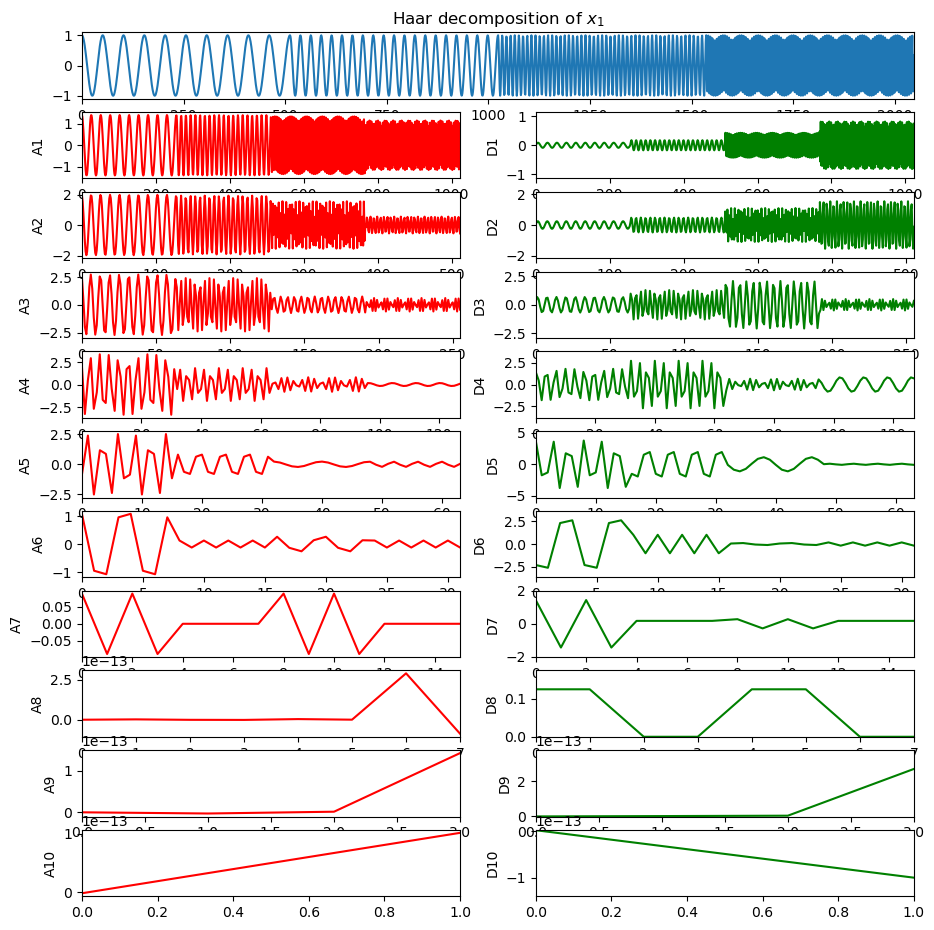

In [22]:
# display the decomposition of x1
plot_haar_coeffs(x1,"Haar decomposition of $x_1$" ,10)

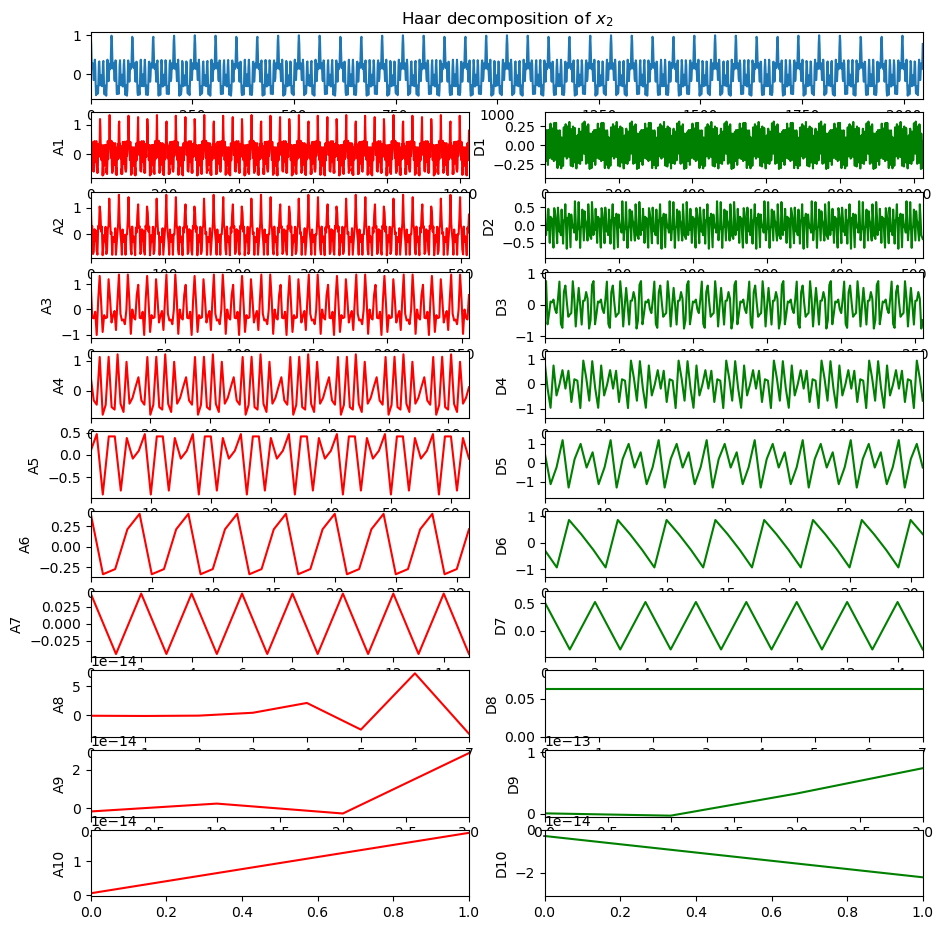

In [23]:
# display the decomposition of x2
plot_haar_coeffs(x2,"Haar decomposition of $x_2$" ,10)

<!-- END QUESTION -->

## Part III - Denoising

We will now use the different transforms defined in part I and II to perform denoising.
Let us create a noisy signal for this purpose.

In [24]:
angle1 = np.linspace(0, 5*np.pi/2, 300)
wave1  = np.sin(angle1)
angle2 = np.linspace(0, 3*np.pi/2, 300)
wave2  = np.sin(angle2)
angle3 = np.linspace(np.pi/2, 2*np.pi, 424)
wave3  = np.sin(angle3)
wave   = np.append(wave1, wave2)
wave   = np.append(wave, wave3)
wave_noisy = wave + 0.2*np.random.normal(0, 1, 1024)

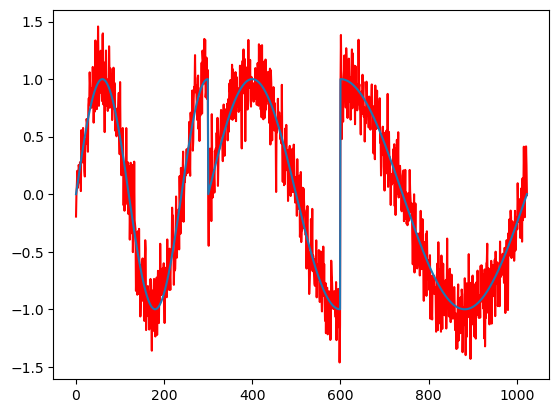

In [25]:
plt.plot(wave_noisy, 'r')
plt.plot(wave)

The noise is usually located in the higher frequencies. However, the signal we created is a bit special as it has two discontinuities which also generate high frequencies components (remember the Fourier transform of a rectangle function is a sinc). 

<!-- BEGIN QUESTION -->

14. Implement a function `denoise_signal` that perform denoising of the input signal by using a supplied orthonormal transform matrix, and by setting the transformed coefficients having an amplitude smaller than a given threshold to 0. You might want to use the [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function for this. When denoising using the Haar transform, you can preform the thresholding only on the detail coefficients. Implement the function `denoise_signal_haar` that performs this operation.

NB: The result returned should be real, in order to be displayed. 

In [26]:
def denoise_signal(W, x, threshold=0.1):
    """
    W: NxN input orthonormal matrix (Fourier, block-Fourier or Haar)
    x: input signal (of length N)
    """
    x_hat = W@x
    x_hat[np.abs(x_hat) < threshold] = 0
    return np.real(W.conj().T@x_hat)

In [27]:
def denoise_signal_haar(W, x, threshold=0.1, detail_start_index=256):
    """
    W: NxN input orthonormal matrix (Fourier, block-Fourier or Haar)
    x: input signal (of length N)
    detail_start_index: thresholding is performed on x[detail_start_index:]
    """
    x_hat = W@x
    x_hat[detail_start_index:] = np.where(np.abs(x_hat[detail_start_index:])< threshold,0,x_hat[detail_start_index:])
    return np.real(W.conj().T@x_hat)

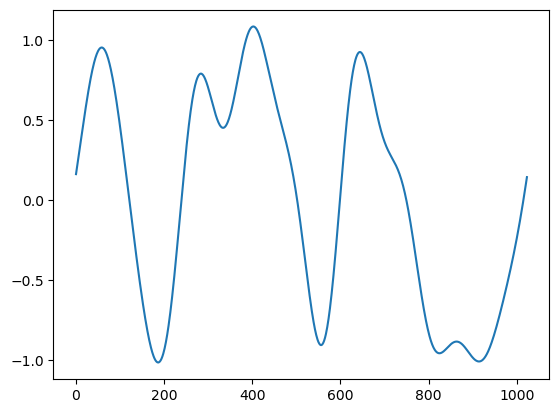

In [28]:
# Perform denoising with the full Fourier transform and display the result. 
# Make sure you choose a good threshold
x1_denoised = denoise_signal(get_fourier_matrix(1024), wave_noisy, 1.5)
plt.plot(x1_denoised)

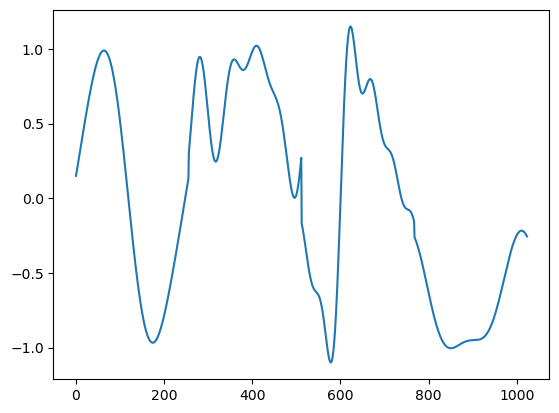

In [29]:
# Perform denoising with the block Fourier transform and display the result
# Make sure you choose a good threshold and block size
x2_denoised = denoise_signal(get_block_dft_matrix(1024,256), wave_noisy, 0.85)
plt.plot(x2_denoised)

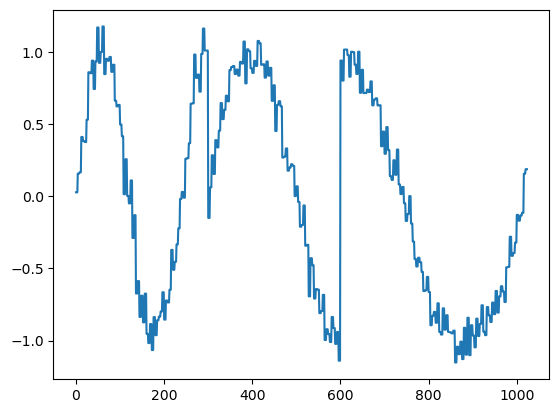

In [30]:
# Perform denoising with the Haar transform and display the result
# Make sure you choose a good threshold and an appropriate number of levels
x3_denoised = denoise_signal_haar(get_haar_matrix(1024, 2), wave_noisy, 2)
plt.plot(x3_denoised)

In [31]:
grader.check("q14")

q14 results: All test cases passed!
q14 - 1 message: Good, not denoising the noisy signal does not modify it.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

15. Compare the three denoising methods (Fourier, block Fourier and Haar). Which one performs better (in terms of noise removal but also in terms of discontinuity preservation) ? Was that expected (justify) ?

The best noise removal is done by the full fourier matrix, the one that preserves discontinuities the best is the haar matrix. The block fourier matrix is somewhere in the middle. <br>
This is expected: <br>
- In the case of the Fourier matrix, we know that (white) noise give low amplitude frequency components that are present at every frequency, so thresholding the frequency domain would be really effective to get rid of them. However, given the fact that discontinuities are represented by extremely high frequency components and because our fourier matrix is of limited lenght, we could never reach those high frequency components and so, the very steep slopes of the discontinuities are somewhat lost.

- In the case of the Haar matrix, we know that is decomposes a signal in Haar wavelets components which are square wavelets. The fact that these wavelets are square help perfectly preserve the discontinuities. However this might not be very suited to remove (white) noise because Haar wavelets are discontinuous while noise (in the real world) is continuous so noise mais not be as easy to threshold with Haar matrices as it was with the Fourier matrix.


<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload your notebook and separate pdf for theoretical questions if needed

In [34]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...




Your submission received the following results when run against available test cases:

    q4 results: All test cases passed!
    q4 - 1 message: Good, your implementation returns correct results
    q4 - 2 message: Good, you did not use the scipy.linalg.dft function
    q4 - 3 message: Good, you did not use the scipy.fft.fft function
    q4 - 4 message: Good, you did not use the numpy.fft.fft function
    q4 - 5 message: Good, your implementation returns an orthogonal matrix
    q4 - 6 message: Good, you properly validated size before computing the result

    q6 results: All test cases passed!
    q6 - 1 message: Good, your implementation returns an orthogonal matrix
    q6 - 2 message: Good, you properly validated size before computing the result
    q6 - 3 message: Good, your implementation returns the correct result

    q10 results: All test cases passed!
    q10 - 1 message: Good, you properly validated size before computing the result
    q10 - 2 message: Good, results look co